# Accessing Imagery Collections and Raster Data Cubes through SpatioTemporal Asset Catalogs (STAC)

## Raster Data Cube

[Kopp et al., 2019](https://doi.org/10.3390/data4030094) defines **data cubes** as a generic term used to describe an array of multiple dimensions. Data cubes help to organize data, simplifying data management and often improving the performance of queries and analysis.

According to [Appel & Pebesma, 2019](https://doi.org/10.3390/data4030092) a **regular**, **dense** **raster data cube** is a four-dimensional array with dimensions **x** (*longitude or easting*), **y** (*latitude or northing*), **time**, and **bands** with the following properties:
* Spatial dimensions refer to a single **spatial reference system** (SRS),
* Cells of a data cube have a **constant spatial size** (with regard to the cube’s SRS),
* The spatial reference is defined by a simple **offset** and the **cell size** per axis (i.e. the cube axes are aligned the SRS axes),
* Cells of a data cube have a **constant temporal duration**, defined by an integer number and a date / time (*years, months, days, hours, minutes, or seconds*),
* The **temporal reference** is defined by a simple start date/time and the temporal duration of cells,
* For **every combination** of dimensions, a cell has a single, scalar (real) **attribute value**.

Building a data cube can include **information loss**, so it should be a process that considers **user definitions** and **restrictions** for one or more applications. In general, the users are capable to construct data cubes from **collections of images** using tools as [gdalcubes](https://github.com/appelmar/gdalcubes_R), [sits](https://e-sensing.github.io/sitsbook/earth-observation-data-cubes.html) or [force](https://www.uni-trier.de/?id=63673).

Here are a few examples of existing raster data cubes:
* [Australian Geoscience Data Cube (data)](https://doi.org/10.1016/j.rse.2017.03.015)
* [Swiss Data Cube (data)](https://doi.org/10.6084/m9.figshare.14635485)
* [Open Environmental Data Cube EU (data)](http://stac.opendatascience.eu)
* [Google Earth Engine (platform)](https://doi.org/10.1016/j.rse.2017.06.031)
* [Microsoft Planetary Computing (platform)](https://planetarycomputer.microsoft.com/)
* [Open Data Cube (platform)](https://www.opendatacube.org/)
* [OpenEO Platform (platform)](https://openeo.cloud/)


![Raster data cube](https://gitlab.com/leal.parente/geo-snippets/-/raw/main/data_cubes/Accessing_and_using_data_cubes_summer_school_2022/data_cube.png)

Image source: [Kopp et al., 2019](https://doi.org/10.3390/data4030094)

## Cloud-Optimized GeoTIFF (COG)

A COG is a regular [GeoTIFF](https://www.ogc.org/standards/geotiff) file, aimed at being hosted on a HTTP file server, with an [internal organization](https://www.cogeo.org/in-depth.html) that enables more efficient workflows on the cloud ([Cloud-native geospatial formats](https://www.ogc.org/blog/4609)). There are **three key aspects** that makes COG a powerful format for geospatial applications:
* [**Lossless compression**](https://gdal.org/drivers/raster/cog.html#general-creation-options): compression able to restore / rebuild the file data in its original form after the file is decompressed without lose data.
* [**Tilling and overviews**](https://gdal.org/drivers/raster/cog.html#creation-options): tilling **strips** a raster data into regular **squared tiles** (256 x 256), keeping them **physically close** on storage devices (hard drives) improving the read performance for a subset of the raster data. **Overviews** are pre-computed representations in **coarser spatial resolution** for raster data, enabling a quick visualization of all the pixels / cells without load the **full data** from the storage device.
* [**HTTP Get Range requests**](https://developer.mozilla.org/en-US/docs/Web/HTTP/Range_requests): request that asks the server to send only a **portion** of an HTTP message back to a client, enabling **random access** to the raster data.

![Raster data cube](https://gitlab.com/leal.parente/geo-snippets/-/raw/main/data_cubes/Accessing_and_using_data_cubes_summer_school_2022/cog.png)

One of the best ways to make a COG available is using **cloud [Object Store](https://www.redhat.com/en/topics/data-storage/file-block-object-storage) solution** (AWS, Google Cloud Storage, Wasabi). Object storage is a data storage architecture for large stores of unstructured data, which designates each piece of data as an object, keeps it in a separate storehouse, and bundles it with **metadata** and a **unique identifier** for easy access and retrieval.

![Object Store](https://gitlab.com/leal.parente/geo-snippets/-/raw/main/data_cubes/Accessing_and_using_data_cubes_summer_school_2022/object_store.png)

Image source: [RedHat](https://www.redhat.com/en/topics/data-storage/file-block-object-storage)

## SpatioTemporal Asset Catalog (STAC)

The STAC is **specification** that provides a common language to describe a range of geospatial information, seeking to make it more easily indexed and discoverable. A **spatiotemporal asset** (Imagery, SAR, Point Clouds, Data Cubes, Full Motion Video, etc) is any file that represents information about the **Earth** captured in a certain **space** and **time**.

![STAC](https://gitlab.com/leal.parente/geo-snippets/-/raw/main/data_cubes/Accessing_and_using_data_cubes_summer_school_2022/stac.png)

* [STAC API](https://github.com/radiantearth/stac-api-spec): family of specifications aim to standardize the way geospatial asset metadata is structured and queried.
* [STAC catalog](https://github.com/radiantearth/stac-spec/blob/master/catalog-spec/catalog-spec.md): represents a logical group of other Catalog, Collection, and Item objects. These Items can be linked to directly from a Catalog, or the Catalog can link to other Catalogs (often called sub-catalogs) that contain links to Collections and Items.
* [STAC collection](https://github.com/radiantearth/stac-spec/blob/master/collection-spec/collection-spec.md): a set of common fields to describe a group of Items that share properties and metadata. The Collection Specification shares all fields with the STAC Catalog Specification (with different allowed values for type and stac_extensions) and adds fields to describe the whole dataset and the included set of Items. Collections can have both parent Catalogs and Collections and child Items, Catalogs and Collections.
* [STAC item](https://github.com/radiantearth/stac-spec/blob/master/item-spec/item-spec.md): is a GeoJSON Feature augmented with foreign members relevant to a STAC object. These include fields that identify the time range and assets of the Item. An Item is the core object in a STAC Catalog, containing the core metadata that enables any client to search or crawl online catalogs of spatial 'assets' (e.g., satellite imagery, derived data, DEMs).
* [STAC best practices](https://github.com/radiantearth/stac-spec/blob/master/best-practices.md#:~:text=The%20current%20best%20practice%20is,match%20an%20existing%20web%20presence.): number of recommendations for creating real world SpatioTemporal Asset Catalogs.
* [Static and Dynamic Catalogs](https://github.com/radiantearth/stac-spec/blob/master/overview.md#static-and-dynamic-catalogs): Static catalog is composed by linked json files on a file server or an object storage service (AWS S3). Dynamic catalog is any catalog that is not just files.
* *Dynamic Catalog*:
    * [stac-server](https://github.com/stac-utils/stac-server): "Official" implementation of the STAC API.
    * [pygeoapi](https://docs.pygeoapi.io/en/stable/configuration.html?highlight=stac#resources): Python server implementation of the OGC API suite of standards
    * [Franklin](https://github.com/azavea/franklin): A STAC and OGC API Features compliant web service focused on ease-of-use for end-users.
    * [staccato](https://github.com/planetlabs/staccato): Server that enables browsing and search of geospatial assets like satellite imagery. It implements the SpatioTemporal Asset Catalog (STAC) v1.0.0 standard and is backed by Elasticsearch.

## Geospatial software stack in python

Mostly of python geospatial libraries depends of ```OGR/GDAL```, ```GEOS``` and ```PROJ``` (C/C++ libraries), which means that ```rasterio``` is not actually responsible to read or write raster files, under the hood ```GDAL``` does this tasks. The easiest way to manage these C/C++ dependencies in python is using [Conda](https://docs.conda.io/en/latest/) (or its faster brother [Mamba](https://mamba.readthedocs.io/en/latest/)) to geospatial libraries.

![Python Geospatial Stack](https://gitlab.com/leal.parente/geo-snippets/-/raw/main/hackathon/pasture_classification_summer_school_2022/python_geospatial_stack.png)

* [Fiona](https://fiona.readthedocs.io/en/latest/README.html):Fiona reads and writes geographic data files and thereby helps Python programmers integrate geographic information systems with other computer systems. Fiona contains extension modules that link the Geospatial Data Abstraction Library (GDAL).
* [GeoPandas](https://geopandas.org/en/stable/): GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.
* [GEOS](https://libgeos.org/): library for computational geometry with a focus on algorithms used in geographic information systems (GIS) software,
* [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/): Interactive maps in the Jupyter notebook.
* [Jupyter Notebooks](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html#notebook): Jupyter notebooks are documents that combine live runnable code with narrative text (Markdown), equations (LaTeX), images, interactive visualizations and other rich output.
* [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/): JupyterLab enables you to work with documents and activities such as Jupyter notebooks, text editors, terminals, and custom components in a flexible, integrated, and extensible manner.
* [Numpy](https://numpy.org/): library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* [OGR/GDAL](https://gdal.org/): GDAL is a translator library for raster and vector geospatial data formats,
* [Pandas](https://pandas.pydata.org/): library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
* [PROJ](https://proj.org/): PROJ is a generic coordinate transformation software that transforms geospatial coordinates from one coordinate reference system (CRS) to another.
* [pygeos](https://pygeos.readthedocs.io/en/stable/): library with vectorized geometry functions. The geometry operations are done in the open-source geometry library GEOS.
* [python-gdal](https://pypi.org/project/GDAL/): This Python package and extensions are a number of tools for programming and manipulating the GDAL Geospatial Data Abstraction Library
* [scikit-learn](https://scikit-learn.org/stable/getting_started.html): open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.
* [SciPy](https://scipy.org/): SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.
* [Shapely](https://pypi.org/project/Shapely/): Package for manipulation and analysis of planar geometric objects. It is based on the widely deployed GEOS (the engine of PostGIS) and JTS (from which GEOS is ported) libraries. Shapely is not concerned with data formats or coordinate systems, but can be readily integrated with packages that are.
* [Statsmodels](https://www.statsmodels.org/stable/index.html): Library that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration

## Installing the libraries

Most part of these libraries are used by [scikit-map](https://github.com/scikit-map/scikit-map), a library developed to enable mapping through machine learning, reference samples and raster data, fully compatible with scikit-learn and distributed under the MIT license.

### Regular Python environment

[Scikit-map](https://github.com/scikit-map/scikit-map) can be installed using `pip`:

In [1]:
!pip install -e 'git+https://github.com/scikit-map/scikit-map#egg=scikit-map[full]'

Defaulting to user installation because normal site-packages is not writeable
Obtaining scikit-map[full] from git+https://github.com/scikit-map/scikit-map#egg=scikit-map[full]
  Cloning https://github.com/scikit-map/scikit-map to ./src/scikit-map
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-map/scikit-map /home/opengeohub/leandro/Code/scikit-map/src/scikit-map
  Resolved https://github.com/scikit-map/scikit-map to commit 7e8cc4996e1315e0cb827464591cab3dfc9f5e83
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 10.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 11.9 MB/s eta 0:00:00
  Running setup.py develop for scikit-map
ERROR: pip's dependency resolver does not currently take into accou

For this tutorial you also need to install [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/) and [leafmap](https://leafmap.org/):

In [2]:
!pip install ipyleaflet leafmap

Defaulting to user installation because normal site-packages is not writeable


## MODIS Vegetation Index (EVI)

To demonstrate how to access data through STAC we will use [OpenLandMap catalog](https://stac.openlandmap.org/) (under construction). OpenLandMap is a Web-GIS system developed by [OpenGeoHub](https://opengeohub.org/) able to provide access to spatial layers and services covering global land mass (at spatial resolutions of 1 km, 250 m or finer resolution).

Let's use [pystac](https://pystac.readthedocs.io/en/stable/) to access the catalog:

In [3]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj/'

from pathlib import Path
import numpy as np
from skmap.misc import ttprint
import pystac
import rasterio

STAC_URL = 'https://s3.eu-central-1.wasabisys.com/stac/openlandmap/catalog.json'
catalog = pystac.Catalog.from_file(STAC_URL)

Considering that the current implementation of OpenLandMap is a static catalog, you need to provide a collection id.

In [4]:
collection_id = "veg_evi.mod13q1_tmwm.inpaint" # Collection ID
catalog.get_child(collection_id)

<Collection id=veg_evi.mod13q1_tmwm.inpaint>

For reading the images you need to retrieve the COG URLs from all the collection items. The URLs are stored as assets of a item ([check it on StacBrower](https://stac.openlandmap.org/veg_evi.mod13q1_tmwm.inpaint/veg_evi.mod13q1_tmwm.inpaint_2001.01.01..2001.02.28/veg_evi.mod13q1_tmwm.inpaint_2001.01.01..2001.02.28.json)).

In [5]:
media_types = [pystac.MediaType.GEOTIFF, pystac.MediaType.COG]

raster_urls = []

for collection_item in catalog.get_child(collection_id).get_all_items():
    for item_id, item in collection_item.get_assets().items():
        if item.media_type in media_types:
            if 'p90' in item.href:
                raster_urls.append(item.href)

print(f"Collection {collection_id} COG URLS ({len(raster_urls)} files)")
print(f'First URL: {raster_urls[0]}')

Collection veg_evi.mod13q1_tmwm.inpaint COG URLS (126 files)
First URL: https://s3.eu-central-1.wasabisys.com/openlandmap/veg/veg_evi.mod13q1_tmwm.inpaint_p90_250m_0..0cm_2000.01.01..2000.02.28_v0.2.tif


### Lazy loading

It's possible to use the [rasterio](https://rasterio.readthedocs.io/en/latest/)  to access the metadata of the COGs without read / download all the actual data:

In [6]:
idx = 0
url = raster_urls[idx]
src = rasterio.open(url)

print(f'File {url}\n')
for (key, val) in src.profile.items():
    print(f'-{key}: {val}')

File https://s3.eu-central-1.wasabisys.com/openlandmap/veg/veg_evi.mod13q1_tmwm.inpaint_p90_250m_0..0cm_2000.01.01..2000.02.28_v0.2.tif

-driver: GTiff
-dtype: int16
-nodata: -32768.0
-width: 160300
-height: 65200
-count: 1
-crs: EPSG:4326
-transform: | 0.00, 0.00,-180.00|
| 0.00,-0.00, 84.28|
| 0.00, 0.00, 1.00|
-blockxsize: 1024
-blockysize: 1024
-tiled: True
-compress: deflate
-interleave: band


Multiplying the ``width`` by the ``height`` it's possible to check that it's a BIG image:

In [7]:
n_pixels = src.profile['width'] * src.profile['height']
print(f'Total number of pixels: {n_pixels}')

Total number of pixels: 10451560000


However you can use the COG structure to calculate the shape of a low resolution overview (pyramid layer), reading a small portion of the data in a quickly thumbnail format:

In [8]:
import rasterio
from skmap.io import read_rasters
url = 'https://s3.eu-central-1.wasabisys.com/openlandmap/veg/veg_evi.mod13q1_tmwm.inpaint_p90_250m_0..0cm_2000.01.01..2000.02.28_v0.2.tif'
data = read_rasters(url, overview=64, verbose=True)
data.shape

[23:00:04] Reading 1 raster file(s) using 1 workers


(1018, 2504, 1)

In [9]:
from skmap.io import read_rasters

idx = 10
overview = read_rasters(raster_urls[idx], overview=32, verbose=True)
print(f'\nOverview dimensions: {overview.shape}')

[23:00:06] Reading 1 raster file(s) using 1 workers

Overview dimensions: (2037, 5009, 1)


Let's plot the resulting thumbnail:

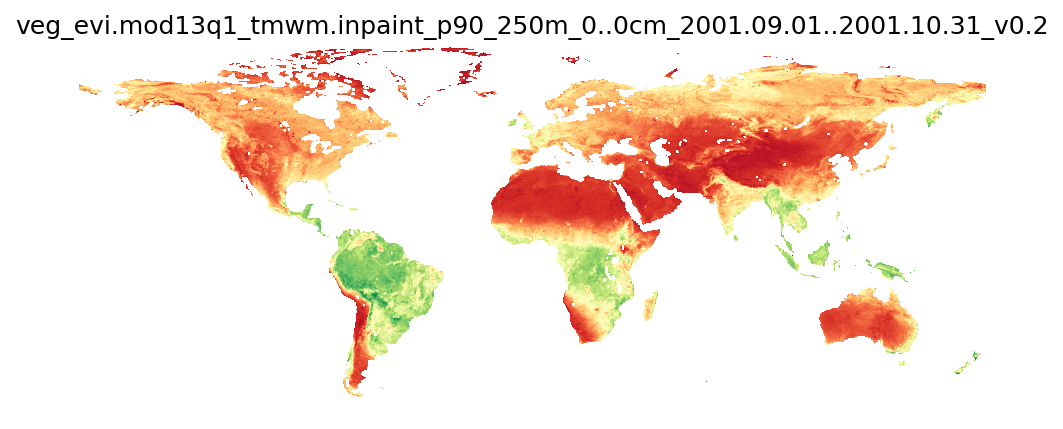

In [10]:
from skmap import plotter
plotter.plot_rasters(overview[:,:,0], figsize=8, cmaps='RdYlGn', nodata=src.nodata, vmin=0, vmax=8000, titles=[Path(raster_urls[idx]).stem])

Overviews are actual data and can be used to derive analysis. 
You can compute the annual maximum NDVI (using [Bottleneck](https://bottleneck.readthedocs.io/en/latest/)) for the World and quickly check the result:

[23:00:11] Reading 6 raster file(s) using 4 workers


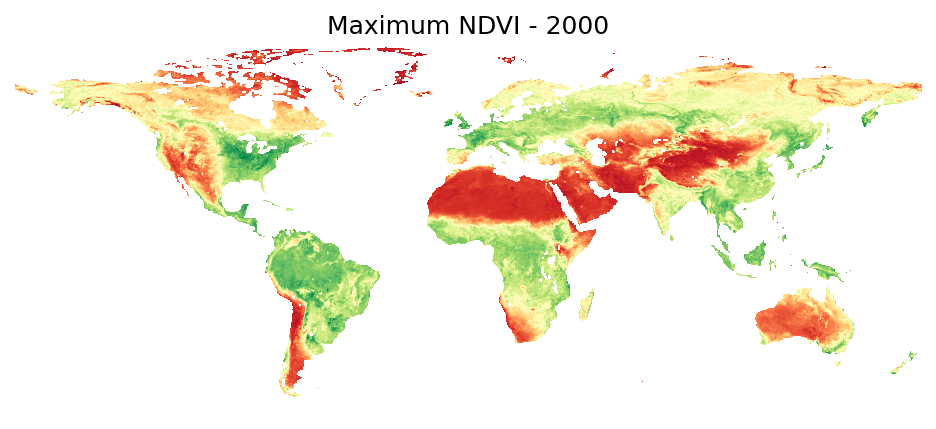

In [11]:
import bottleneck as bn

urls = raster_urls[0:6]
overview = read_rasters(urls, overview=32, verbose=True)

overview_max = bn.nanmax(overview, axis=-1)
year = Path(urls[0]).name.split('_')[6][0:4]

plotter.plot_rasters(overview_max, figsize=8, cmaps='RdYlGn', nodata=src.nodata, vmin=0, vmax=8000, titles=f'Maximum NDVI - {year}')

## Data reading and writing

To access the dataset in a full resolution, it's recommended subset the COG file by a geographic region.

To help in the definition of this region, let's make an interactive map with [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/), defining a `DrawControl` and add it to the map controls.

In [12]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, DrawControl, LayersControl

m = Map(center=(51.98, 5.65), zoom = 2, basemap= basemaps.OpenStreetMap.Mapnik)

draw_control = DrawControl()
draw_control.rectangle = {
    "shapeOptions": {
        "color": "#ff0000",
        "fillOpacity": 0,
        "opacity": 1
    }
}

m.add_control(draw_control)
m.add_control(LayersControl())

m

Map(center=[51.98, 5.65], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

You can now select the feature from `DrawControl.data` and get its bounds.

In [13]:
from shapely.geometry import shape
from rasterio.windows import Window, from_bounds

geometry = shape(draw_control.data[-1]['geometry'])
bounds = geometry.bounds
window = from_bounds(bounds[0], bounds[1], bounds[2], bounds[3], src.transform)
print("\nBounds: ", bounds[0], bounds[1], bounds[2], bounds[3])
print("Raster window:", window)


Bounds:  5.493164 51.985931 5.738983 52.100383
Raster window: Window(col_off=82596.98487733667, row_off=14326.84031064756, width=109.45778362928831, height=50.962953441110585)


With the defined window you can quickly read the COG file:

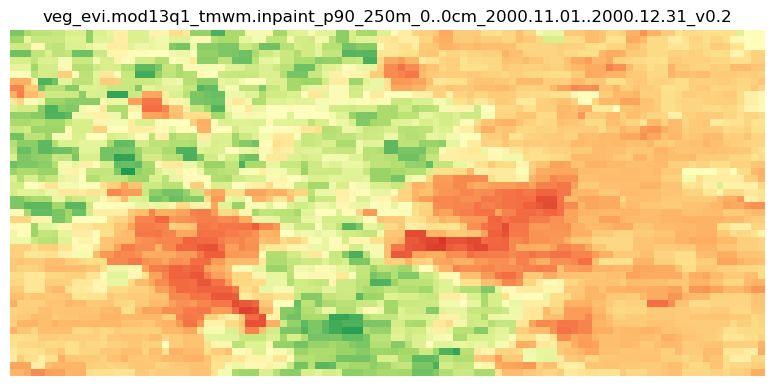

In [14]:
from skmap.io import read_rasters, save_rasters

idx = 5
raster_url = raster_urls[idx]

data = read_rasters(raster_url, window=window)
plotter.plot_rasters(data[:,:,0], cmaps='RdYlGn', dpi=100, nodata=src.nodata, vmin=0, vmax=8000, titles=[Path(raster_url).stem])

Let's compare with the last image of the time series:

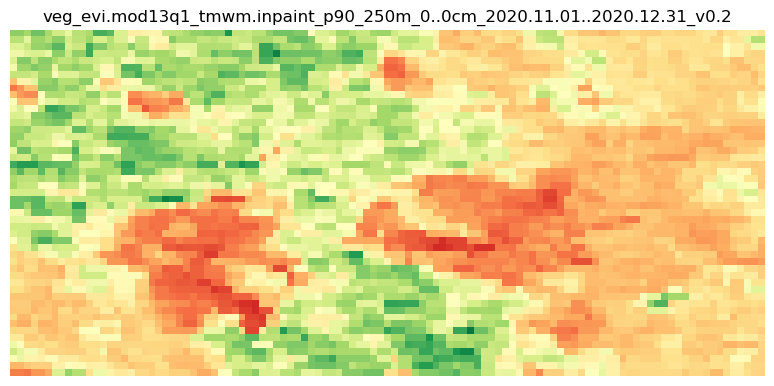

In [15]:
idx = len(raster_urls) - 1
raster_url = raster_urls[idx]

data = read_rasters(raster_url, window=window)
plotter.plot_rasters(data[:,:,0], cmaps='RdYlGn', dpi=100, nodata=src.nodata, vmin=0, vmax=8000, titles=[Path(raster_url).stem])

Using `skmap.io` you can save the clipped data by passing the COG as the reference file along with the window definition:

In [16]:
outdir = Path(os.getcwd()).joinpath('MODIS_EVI')
i0, i1 = (0,6)

outfiles = [ outdir.joinpath(f'{Path(f).stem}_clip.tif') for f in raster_urls[i0:i1] ]

data = read_rasters(raster_files=raster_urls[i0:i1], window=window, n_jobs=4, verbose=True)
r = save_rasters(raster_urls[0], outfiles, data, window=window, n_jobs=4, verbose=True)

[23:00:56] Reading 6 raster file(s) using 4 workers
[23:01:02] Saving 6 raster files using 4 workers


Lastly, Leafmap provides several functionalities to load COG files:

In [28]:
import leafmap

m = leafmap.Map(draw_control=False, measure_control=False, fullscreen_control=False)
m.add_basemap("HYBRID")

i = -1
m.add_cog_layer(raster_urls[i], palette="RdYlGn", vmin=0, vmax=8000, name=Path(raster_urls[i]).name)

m.add_control(LayersControl())
m.add_colormap(
    'RdYlGn',
    label="NDVI",
    width=8.0,
    height=0.4,
    orientation='horizontal',
    vmin=0,
    vmax=8000,
)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…